<a href="https://colab.research.google.com/github/BhanusreeChavvakula/Projects/blob/main/BREAST_CANCER_PREDICTOR_USING_MACHINE_LEARNING_AND_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#SELECT THE BREAST CANCER FILE

from google.colab import files
uploaded = files.upload()


Saving Breast Cancer.csv to Breast Cancer (3).csv


In [26]:
!pip install numpy pandas matplotlib seaborn plotly scikit-learn xgboost shap

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier
import shap

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('Breast Cancer.csv')

# Display the first 5 rows
print(df.head())

Saving Breast Cancer.csv to Breast Cancer (4).csv
   Unnamed: 0  Patient Id  Age  Menopausal status  Tumor size  Tumor grade  \
0           1         132   49                  0          18            2   
1           2        1575   55                  1          20            3   
2           3        1140   56                  1          40            3   
3           4         769   45                  0          25            3   
4           5         130   65                  1          30            2   

   Lymph nodes  Progesterone Receptor Status  Estrogen Receptor Status  \
0            2                             0                         0   
1           16                             0                         0   
2            3                             0                         0   
3            1                             0                         4   
4            5                             0                        36   

   Hormone Therapy  Recurrence-Free 

**DATA PREPROCESSING**

Drop the Unnecessary colums

In [28]:
# Drop the 'Patient Id' column
df = df.drop(columns=['Patient Id'])

# Display the first 5 rows after dropping the column
print(df.head())

   Unnamed: 0  Age  Menopausal status  Tumor size  Tumor grade  Lymph nodes  \
0           1   49                  0          18            2            2   
1           2   55                  1          20            3           16   
2           3   56                  1          40            3            3   
3           4   45                  0          25            3            1   
4           5   65                  1          30            2            5   

   Progesterone Receptor Status  Estrogen Receptor Status  Hormone Therapy  \
0                             0                         0                0   
1                             0                         0                0   
2                             0                         0                0   
3                             0                         4                0   
4                             0                        36                1   

   Recurrence-Free Survival Time  Patient Status  
0    

Check for Missing Values

In [29]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                       0
Age                              0
Menopausal status                0
Tumor size                       0
Tumor grade                      0
Lymph nodes                      0
Progesterone Receptor Status     0
Estrogen Receptor Status         0
Hormone Therapy                  0
Recurrence-Free Survival Time    0
Patient Status                   0
dtype: int64


Feature Scaling

In [30]:
# Separate features (X) and target (y)
X = df.drop(columns=['Patient Status'])
y = df['Patient Status']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first 5 rows of scaled features
print(X_scaled[:5])

[[-1.72952779e+00 -4.00705428e-01 -1.16855348e+00 -7.93056848e-01
  -2.00242942e-01 -5.50161571e-01 -5.44037177e-01 -6.29212989e-01
  -7.47723819e-01  1.11082727e+00]
 [-1.72447807e+00  1.92569227e-01  8.55758863e-01 -6.53057621e-01
   1.51684029e+00  2.00855597e+00 -5.44037177e-01 -6.29212989e-01
  -7.47723819e-01 -1.12325029e+00]
 [-1.71942836e+00  2.91448336e-01  8.55758863e-01  7.46934654e-01
   1.51684029e+00 -3.67396032e-01 -5.44037177e-01 -6.29212989e-01
  -7.47723819e-01  7.44967879e-01]
 [-1.71437864e+00 -7.96221864e-01 -1.16855348e+00 -3.03059552e-01
   1.51684029e+00 -7.32927110e-01 -5.44037177e-01 -6.03064471e-01
  -7.47723819e-01 -1.47509804e+00]
 [-1.70932893e+00  1.18136032e+00  8.55758863e-01  4.69385165e-02
  -2.00242942e-01 -1.86495448e-03 -5.44037177e-01 -3.93876334e-01
   1.33739220e+00  1.13729369e+00]]


**INTERACTIVE DATA VISUALIZATION**

Correlation Heatmap

In [31]:
# Correlation matrix
corr_matrix = df.corr()

# Interactive heatmap using Plotly
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale='Viridis', title="Correlation Heatmap")
fig.show()

ROC Curve

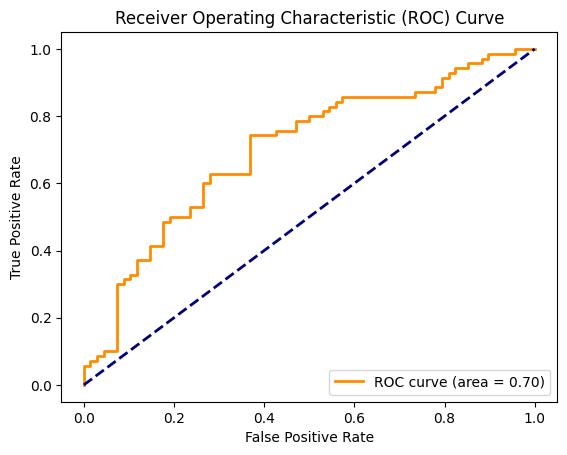

In [32]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier # Import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)  # Create an instance of XGBClassifier
xgb_model.fit(X_train, y_train)  # Train the model

# ROC Curve
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Distribution of Target Variable

In [42]:
# Interactive count plot using Plotly
import plotly.express as px

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# Create the interactive count plot with custom colors
fig = px.histogram(
    df,
    x='Patient Status',
    color='Patient Status',
    title="Distribution of Patient Status",
    color_discrete_sequence=custom_colors  # Add custom colors
)


# Show the plot
fig.show()

**Split the Data into Training and Testing Sets**

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (548, 10) (548,)
Testing set shape: (138, 10) (138,)


**Train and Evaluate Models**

Random Forest Classifier

In [35]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7028985507246377
Confusion Matrix:
 [[58 10]
 [31 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.85      0.74        68
           1       0.80      0.56      0.66        70

    accuracy                           0.70       138
   macro avg       0.72      0.71      0.70       138
weighted avg       0.72      0.70      0.70       138



**Model Predictions with SHAP**

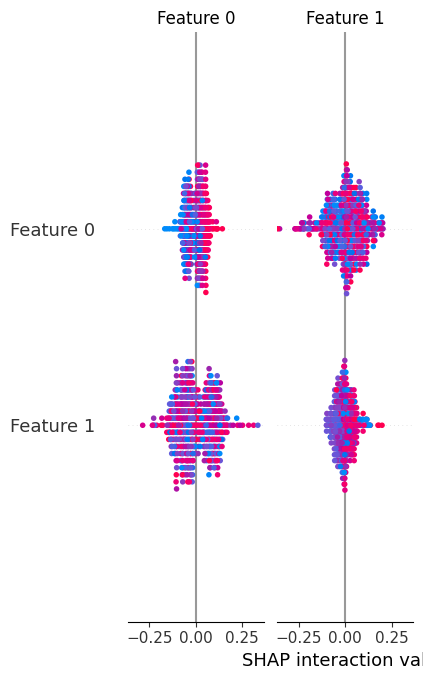

In [36]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values for the first prediction
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [37]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'breast_cancer_rf_model.pkl')

# To load the model later:
# loaded_model = joblib.load('breast_cancer_rf_model.pkl')

['breast_cancer_rf_model.pkl']